In [16]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
#set of random latitude and longitude combinations
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#lat_lngs =zip(lats, lngs)
#lat_lngs
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-49.03200250905034 -57.5828673529422
-89.59252957455486 40.40570552238114
40.51442923763628 117.46872919496133
3.9063552762645344 -11.81842305518316
-68.86287962527403 160.15747523762394
-8.189989658144427 -168.87103530836902
-62.8310929819353 -146.80574839544698
76.7552854489146 56.81300245481552
-68.76801297782791 -22.697197037041462
83.15925533717126 82.43066808926852
-22.571894982684512 -61.596673745928385
58.752939341435905 -158.8334420998149
62.91264158363373 -39.48312514020179
-52.67048055382164 -102.70067487771925
-63.952462876502125 -89.85262701517881
77.08129127979419 -84.27462781996047
36.02625128946971 -138.87927240505684
-58.342600527971086 -112.04873620693174
-23.63333076198002 28.039127402470797
55.24518366251422 54.06508165560268
-49.86465367631952 -130.17231052154614
-3.258605182916355 160.70984515998862
77.33796241202307 152.01482930935805
45.01955286964463 87.54653508525917
-59.85221098286016 -156.68183026460053
66.56843548574636 -176.76539776862307
-66.4284014415764

-21.9775748138904 99.7550066197224
-9.81997887372907 133.19010181223632
67.98477408642654 -26.036449896342333
36.14764265414941 -174.94522688454862
53.505513742464615 -35.72595418396338
-86.15690763306598 81.08514487574928
5.53254042069689 -94.05510861749522
22.738235188150455 12.380612175161929
0.21577155577527662 13.16492970332854
-27.67755861280356 156.26970760485239
-55.26747385898473 93.54066253640576
48.69534413699847 -38.79035730489991
77.07534739856135 -158.43891067715316
-62.06947696572077 129.89854263006941
56.87030467730179 -107.42204966447001
37.94880927137268 -30.40854736192236
85.66741581447681 -44.96835087711415
79.49400885391017 -155.59460823898652
-86.83573052576966 89.94172137790173
29.117337917457277 -120.85055835851661
87.58392708570764 -104.9384518657834
-61.978672394111584 108.39896663093896
-53.79324877874222 29.651677180762107
-71.82799913997654 -175.38806357228117
70.9162418729619 48.668900142860906
65.48015967890808 -84.77584833757777
20.640364682288848 14.413

In [6]:
from citipy import citipy

In [7]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

608

In [27]:
#import dependencies

from datetime import datetime
import requests
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [28]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rocha
Processing Record 2 of Set 1 | beloha
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | narsaq
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | salalah
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | adrar
Processing Record 11 of Set 1 | autazes
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | buesaco
Processing Record 15 of Set 1 | naron
Processing Record 16 of Set 1 | ostrovnoy
Processing Record 17 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 18 of Set 1 | acajutla
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | lavrentiya
Processing Record 21 of Set 1 | norilsk
Processing Record 22 of Set 1 | kodinsk
Processing Record 23 of Set 1 | 

Processing Record 37 of Set 4 | kavieng
Processing Record 38 of Set 4 | colares
Processing Record 39 of Set 4 | armacao dos buzios
City not found. Skipping...
Processing Record 40 of Set 4 | tuktoyaktuk
Processing Record 41 of Set 4 | flinders
Processing Record 42 of Set 4 | belyy
Processing Record 43 of Set 4 | clinton
Processing Record 44 of Set 4 | rapid valley
Processing Record 45 of Set 4 | pueblo bello
Processing Record 46 of Set 4 | lincoln
Processing Record 47 of Set 4 | mayo
Processing Record 48 of Set 4 | port augusta
Processing Record 49 of Set 4 | aykhal
Processing Record 50 of Set 4 | ksenyevka
City not found. Skipping...
Processing Record 1 of Set 5 | pelym
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | revuca
Processing Record 4 of Set 5 | manokwari
Processing Record 5 of Set 5 | dovolnoye
Processing Record 6 of Set 5 | muros
Processing Record 7 of Set 5 | tasiilaq
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | leh
Proc

Processing Record 28 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 29 of Set 8 | misratah
Processing Record 30 of Set 8 | libertador general san martin
Processing Record 31 of Set 8 | vardo
Processing Record 32 of Set 8 | oporelu
Processing Record 33 of Set 8 | verkhnevilyuysk
Processing Record 34 of Set 8 | tartagal
Processing Record 35 of Set 8 | kothi
Processing Record 36 of Set 8 | saleaula
City not found. Skipping...
Processing Record 37 of Set 8 | skiros
City not found. Skipping...
Processing Record 38 of Set 8 | lozuvatka
Processing Record 39 of Set 8 | mbandaka
Processing Record 40 of Set 8 | dudinka
Processing Record 41 of Set 8 | port blair
Processing Record 42 of Set 8 | haines junction
Processing Record 43 of Set 8 | antofagasta
Processing Record 44 of Set 8 | uray
Processing Record 45 of Set 8 | nuuk
Processing Record 46 of Set 8 | debre sina
Processing Record 47 of Set 8 | vila velha
Processing Record 48 of Set 8 | vigrestad
Processing Record 49 of Set

Processing Record 15 of Set 12 | ambon
Processing Record 16 of Set 12 | sangmelima
Processing Record 17 of Set 12 | tsumeb
Processing Record 18 of Set 12 | biak
Processing Record 19 of Set 12 | trat
Processing Record 20 of Set 12 | monrovia
Processing Record 21 of Set 12 | tobol
Processing Record 22 of Set 12 | fairbanks
Processing Record 23 of Set 12 | volterra
Processing Record 24 of Set 12 | yonago
Processing Record 25 of Set 12 | erice
Processing Record 26 of Set 12 | dongsheng
Processing Record 27 of Set 12 | maumere
Processing Record 28 of Set 12 | ha tinh
Processing Record 29 of Set 12 | kutum
Processing Record 30 of Set 12 | rock sound
Processing Record 31 of Set 12 | alice springs
Processing Record 32 of Set 12 | katobu
Processing Record 33 of Set 12 | udarnyy
Processing Record 34 of Set 12 | sao filipe
Processing Record 35 of Set 12 | pemangkat
Processing Record 36 of Set 12 | keflavik
Processing Record 37 of Set 12 | calama
Processing Record 38 of Set 12 | biloela
Processing

In [29]:
len(city_data)


559

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame
#city_data_df = pd.DataFRame(city_data)
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rocha,-34.4833,-54.3333,50.52,80,100,6.04,UY,2022-05-12 01:06:50
1,Beloha,-25.1667,45.0500,62.26,85,0,5.12,MG,2022-05-12 01:05:08
2,Provideniya,64.3833,-173.3000,41.11,70,40,15.66,RU,2022-05-12 01:08:03
3,Hobart,-42.8794,147.3294,57.25,91,75,4.61,AU,2022-05-12 01:08:04
4,Rikitea,-23.1203,-134.9692,76.89,83,8,19.28,PF,2022-05-12 01:08:05
5,Narsaq,60.9167,-46.0500,39.42,99,100,7.63,GL,2022-05-12 01:08:05
6,Kapaa,22.0752,-159.3190,82.38,76,75,14.97,US,2022-05-12 01:08:06
7,Salalah,17.0151,54.0924,86.13,19,100,12.86,OM,2022-05-12 01:08:06
8,Punta Arenas,-53.1500,-70.9167,42.12,81,100,7.70,CL,2022-05-12 01:08:07
9,Adrar,20.5022,-10.0711,86.32,14,100,7.47,MR,2022-05-12 01:08:07


In [31]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rocha,UY,2022-05-12 01:06:50,-34.4833,-54.3333,50.52,80,100,6.04
1,Beloha,MG,2022-05-12 01:05:08,-25.1667,45.0500,62.26,85,0,5.12
2,Provideniya,RU,2022-05-12 01:08:03,64.3833,-173.3000,41.11,70,40,15.66
3,Hobart,AU,2022-05-12 01:08:04,-42.8794,147.3294,57.25,91,75,4.61
4,Rikitea,PF,2022-05-12 01:08:05,-23.1203,-134.9692,76.89,83,8,19.28
5,Narsaq,GL,2022-05-12 01:08:05,60.9167,-46.0500,39.42,99,100,7.63
6,Kapaa,US,2022-05-12 01:08:06,22.0752,-159.3190,82.38,76,75,14.97
7,Salalah,OM,2022-05-12 01:08:06,17.0151,54.0924,86.13,19,100,12.86
8,Punta Arenas,CL,2022-05-12 01:08:07,-53.1500,-70.9167,42.12,81,100,7.70
9,Adrar,MR,2022-05-12 01:08:07,20.5022,-10.0711,86.32,14,100,7.47


In [32]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [34]:
# Extract relevant fields from the DataFrame for plotting
#lats = city_data_df["lats"]
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

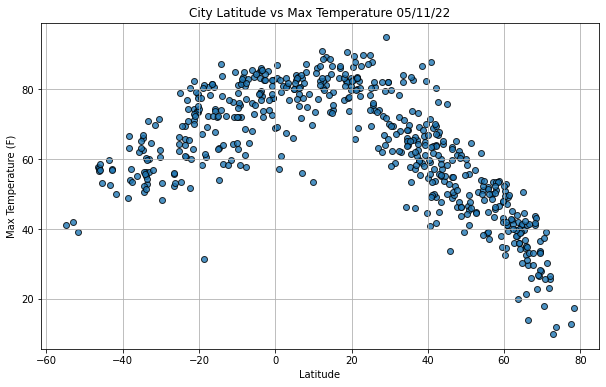

In [49]:
#import time
import time

#build scatter plot for lat vs max temp
plt.subplots(figsize=(10, 6))
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="cities")
#graph props
plt.title(f"City Latitude vs Max Temperature "  + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save fig
plt.savefig("weather_data/Fig1.png")

#show it
plt.show()

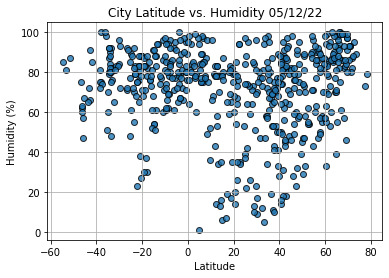

In [50]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

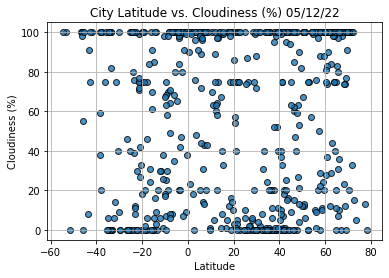

In [51]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

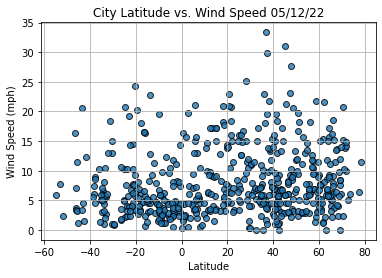

In [52]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()